# Test Profile Results

This code will analize the output of `test_apps_checker.sh` script and will create a visual representaion of how fast each of the rules are running

## Preconditions

`.tmp/profile` directory with profiled `.json` files.

## Import libararies

In [381]:
import pandas as pd 
import os
import json
import matplotlib.pyplot as plt 

## Traserve files and obtain its content

In [382]:
big_json = []
names = []
for filename in os.listdir(os.getcwd() + "/.tmp/profile"):
    with open(os.path.join(os.getcwd() + "/.tmp/profile", filename), 'r') as f:
       json_text = json.loads(f.read())
       big_json.append(json_text["profile"])
       filename = os.path.basename(f.name).split('-')[1].split('.json')[0]
       names.append(filename)

# Create a dataframe and fix the columns

In [383]:
df = pd.DataFrame(big_json)
df['File Name'] = names
columns = df.columns.tolist()
columns.insert(0, columns.pop())
df = df[columns]
print(df[:10]) 


                    File Name  time.clang-tidy.cert-flp30-c.wall  \
0                 auth_acls.h                           0.000029   
1        partitioned_rwlock.h                           0.000022   
2            acl_table_user.h                           0.000019   
3  password_policy_service.cc                           0.000018   
4                user_table.h                           0.000020   
5        sql_authorization.cc                           0.000887   
6     sha2_password_common.cc                           0.000249   
7               auth_common.h                           0.000020   
8      sha2_password_common.h                           0.000024   
9               role_tables.h                           0.000022   

   time.clang-tidy.cert-flp30-c.user  time.clang-tidy.cert-flp30-c.sys  \
0                           0.000011                      1.000000e-05   
1                           0.000012                      5.000000e-06   
2                           0

## Remove unnecessary dataframe parts

In [384]:
# remove dataframe parts
df = df[df.columns.drop(list(df.filter(regex='.*\.sys|.*\.wall')))]

## Export to .cvs information

In [385]:
import uuid
df.to_csv('.tmp/profile-pandas-bu-updated-1-mysql-{}.csv'.format(str(uuid.uuid4())), encoding='utf-8')

## Plot the checker results time and the files

In [334]:
## Remove columns where time.exp45 is less than 0.01 milliseconds
df1 = df.loc[df['time.clang-tidy.cert-exp45-c.user'] >  0.02]
len(df1)

0

<Figure size 400x100 with 0 Axes>

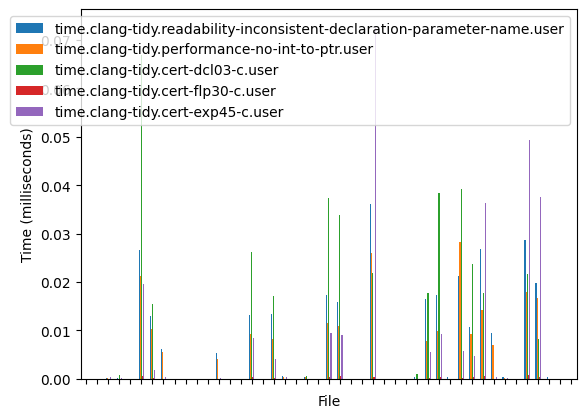

<Figure size 1000x0 with 0 Axes>

In [393]:
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(1)
plot = df.plot(
    x="File Name",
    y=[
        "time.clang-tidy.readability-inconsistent-declaration-parameter-name.user",
        "time.clang-tidy.performance-no-int-to-ptr.user",
        "time.clang-tidy.cert-dcl03-c.user",
        "time.clang-tidy.cert-flp30-c.user",
        "time.clang-tidy.cert-exp45-c.user", 
    ], 
    kind="bar"
)
plt.xlabel("File")
plt.ylabel("Time (milliseconds)")
plot.set_xticklabels([])
plt.figure(figsize=(1,0), dpi=1000)

plt.show()

In [351]:
df.nlargest(1,'time.clang-tidy.cert-exp45-c.user')['time.clang-tidy.cert-exp45-c.user']

21    0.008757
Name: time.clang-tidy.cert-exp45-c.user, dtype: float64

In [97]:
from sqlalchemy import create_engine 
import datetime as dt 
from IPython.display import display

# interactive graphing
import plotly.offline as py 
from plotly.graph_objs import Bar

In [357]:
display(pd.read_csv('.tmp/profile-pandas-bu-updated-1-ffmpeg-68320386-98ca-412f-84c0-9164ffd53a93.csv', nrows=2).head())

,Unnamed: 0,File Name,time.clang-tidy.cert-flp30-c.user,time.clang-tidy.cert-dcl03-c.user,time.clang-tidy.cert-exp45-c.user,time.clang-tidy.performance-no-int-to-ptr.user,time.clang-tidy.readability-inconsistent-declaration-parameter-name.user
0,0,sql_user.cc,0.000125,0.044636,0.055799,0.002602,0.004353
1,1,sql_auth_cache.cc,0.000157,0.030018,0.046265,0.002368,0.004129


In [372]:
df2 = pd.read_csv('.tmp/-81bcf952-8bf1-4f5e-8275-064ba5fbd3dprofile-pandas-td-mysql5.csv')
df2 = df2.sort_values(by="File Name", ascending=False)

<Figure size 400x100 with 0 Axes>

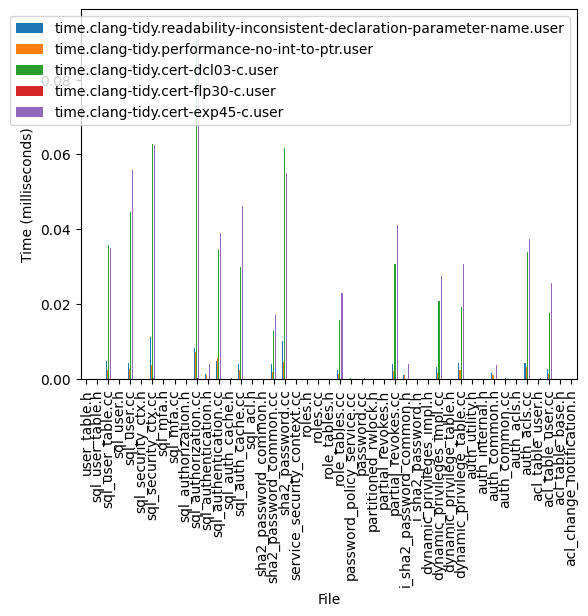

<Figure size 1000x0 with 0 Axes>

In [394]:
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(1)
plot = df2.plot(
    x="File Name",
    y=[
        "time.clang-tidy.readability-inconsistent-declaration-parameter-name.user",
        "time.clang-tidy.performance-no-int-to-ptr.user",
        "time.clang-tidy.cert-dcl03-c.user",
        "time.clang-tidy.cert-flp30-c.user",
        "time.clang-tidy.cert-exp45-c.user", 
    ], 
    kind="bar"
)
plt.xlabel("File")
plt.ylabel("Time (milliseconds)")
# plot.set_xticklabels([])
plt.figure(figsize=(1,0), dpi=1000)

plt.show()

In [389]:
df3 = pd.read_csv('.tmp/profile-pandas-bu-updated-1-mysql-a03317aa-7a03-43d3-ba85-f7b81ab65dcc.csv')
# df3 = df3[sorted(df3)]

df3 = df3.sort_values(by="File Name", ascending=False)

<Figure size 400x100 with 0 Axes>

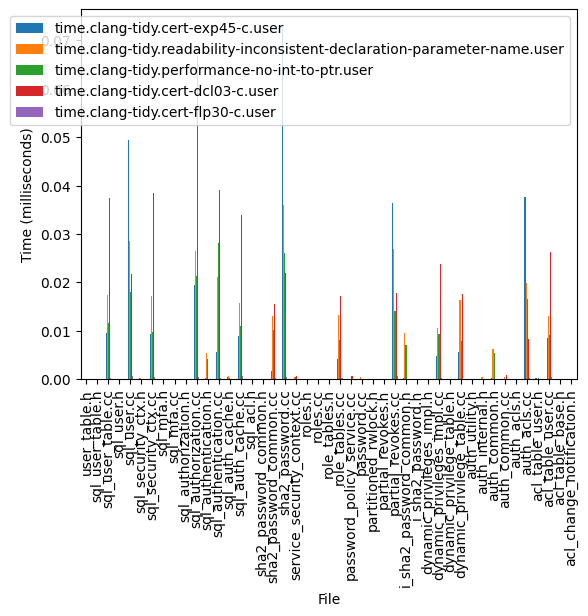

<Figure size 1000x0 with 0 Axes>

In [395]:
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(1)
plot = df3.plot(
    x="File Name",
    y=[

        "time.clang-tidy.cert-exp45-c.user", 
        "time.clang-tidy.readability-inconsistent-declaration-parameter-name.user",
        "time.clang-tidy.performance-no-int-to-ptr.user",
        "time.clang-tidy.cert-dcl03-c.user",
        "time.clang-tidy.cert-flp30-c.user",
    ], 
    kind="bar"
)
plt.xlabel("File")
plt.ylabel("Time (milliseconds)")
# plot.set_xticklabels([])
plt.figure(figsize=(1,0), dpi=1000)

plt.show()

In [317]:
def get_different_rows(source_df, new_df):
    """Returns just the rows from the new dataframe that differ from the source dataframe"""
    merged_df = source_df.merge(new_df, indicator=True, how='outer')
    changed_rows_df = merged_df[merged_df['_merge'] == 'right_only']
    return changed_rows_df.drop('_merge', axis=1)

In [318]:
get_different_rows(df2, df3)

,Unnamed: 0,File Name,time.clang-tidy.cert-flp30-c.user,time.clang-tidy.cert-dcl03-c.user,time.clang-tidy.cert-exp45-c.user,time.clang-tidy.performance-no-int-to-ptr.user,time.clang-tidy.readability-inconsistent-declaration-parameter-name.user
45,21,user_table.h,3.000000e-06,2.000000e-06,1.000000e-06,0.000000e+00,1.200000e-05
46,4,sql_user_table.h,3.000000e-06,2.000000e-06,1.000000e-06,2.000000e-06,1.900000e-05
47,26,sql_user_table.cc,9.800000e-05,3.469800e-02,3.545000e-03,2.234000e-03,5.143000e-03
48,16,sql_user.h,2.000000e-06,1.000000e-06,1.000000e-06,0.000000e+00,0.000000e+00
49,5,sql_user.cc,1.720000e-04,1.613800e-02,2.590000e-02,2.654000e-03,5.431000e-03
50,29,sql_security_ctx.h,2.000000e-06,0.000000e+00,1.000000e-06,1.000000e-06,5.000000e-05
51,39,sql_security_ctx.cc,8.100000e-05,2.985900e-02,3.442000e-03,2.006000e-03,5.211000e-03
52,23,sql_mfa.h,3.000000e-06,2.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06
53,1,sql_mfa.cc,5.000000e-06,2.000000e-06,1.000000e-06,2.000000e-06,2.000000e-06
54,11,sql_authorization.h,2.000000e-06,1.000000e-06,1.000000e-06,2.000000e-06,1.700000e-05


In [377]:
# Find total time of the checkers execution

df2['time.clang-tidy.cert-exp45-c.user'].sum()

0.603311999999965

In [378]:
df3['time.clang-tidy.cert-exp45-c.user'].sum()

## Overall Bottom-Up solution is approx. 4 times faster than TopDown

0.04218799999999989

In [379]:
df2['time.clang-tidy.cert-exp45-c.user'].describe()

count    45.000000
mean      0.013407
std       0.022367
min       0.000000
25%       0.000001
50%       0.000036
75%       0.025712
max       0.094002
Name: time.clang-tidy.cert-exp45-c.user, dtype: float64

In [391]:
df3['time.clang-tidy.cert-exp45-c.user'].describe()

count    45.000000
mean      0.006125
std       0.014764
min       0.000004
25%       0.000008
50%       0.000012
75%       0.004746
max       0.072732
Name: time.clang-tidy.cert-exp45-c.user, dtype: float64